In [2]:
import librosa 
import librosa.display 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
sam='./Data/genres_original/blues/blues.00000.wav'
data,sample_rate=librosa.load(sam)

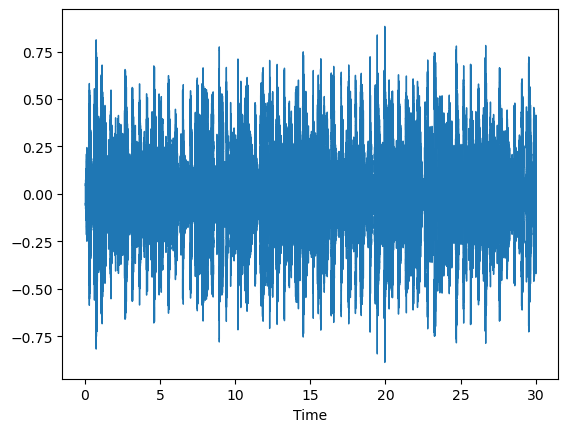

In [4]:
librosa.display.waveshow(data,sr=sample_rate)

In [5]:
mfcc=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)

In [5]:
mfcc.shape

(40, 1293)

In [6]:
df=pd.read_csv('./Data/features_30_sec.csv')

In [7]:
df=df[['filename','label']]

In [8]:
df

,filename,label
0,blues.00000.wav,blues
1,blues.00001.wav,blues
2,blues.00002.wav,blues
3,blues.00003.wav,blues
4,blues.00004.wav,blues
...,...,...
995,rock.00095.wav,rock
996,rock.00096.wav,rock
997,rock.00097.wav,rock
998,rock.00098.wav,rock


In [9]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
  
df['encoded_label']= label_encoder.fit_transform(df['label']) 
  
actual_labels=df['label'].unique() 

In [10]:
def mfcc_process(file_name):
    data,sample_rate=librosa.load('./Data/genres_original/'+file_name.split('.')[0]+'/'+file_name)
    mfcc=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
    mfcc_processed=np.mean(mfcc.T,axis=0)
    return mfcc_processed

In [11]:
mfcc_process('blues.00000.wav')

array([-1.1359882e+02,  1.2157067e+02, -1.9162262e+01,  4.2363941e+01,
       -6.3622661e+00,  1.8621931e+01, -1.3699734e+01,  1.5339802e+01,
       -1.2274305e+01,  1.0970944e+01, -8.3260603e+00,  8.8020878e+00,
       -3.6699412e+00,  5.7446756e+00, -5.1627831e+00,  7.5170642e-01,
       -1.6878541e+00, -4.0873003e-01, -2.3026767e+00,  1.2224671e+00,
       -3.5328746e+00, -1.1397806e+00, -4.2828279e+00, -4.2260838e+00,
        9.1518766e-01,  9.1406381e-01, -5.7618070e+00, -3.9328036e+00,
        1.5094347e+00,  2.6984656e+00,  5.6560731e+00, -3.2690079e+00,
       -2.0606379e-01, -2.9996982e+00,  4.4763165e+00, -4.7685507e-01,
        6.0062852e+00, -5.9690334e-02, -3.4585848e+00, -1.8418322e+00],
      dtype=float32)

In [12]:
df['mfcc_normalize']=df['filename'].apply(mfcc_process)

In [13]:
df['mfcc_normalize'][0].shape

(40,)

In [1]:
df

NameError: name 'df' is not defined

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=np.array(df['mfcc_normalize'].tolist())
y=df['encoded_label']
y=np.array(y.tolist())
y=to_categorical(y, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)


In [16]:
model=Sequential()
model.add(Dense(256,input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [17]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=32,callbacks=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 5.3074 - accuracy: 0.1425 - val_loss: 2.1114 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 2.5940 - accuracy: 0.1850 - val_loss: 2.0842 - val_accuracy: 0.2250
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 2.3383 - accuracy: 0.1825 - val_loss: 2.0812 - val_accuracy: 0.2500
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 2.1988 - accuracy: 0.2288 - val_loss: 1.9441 - val_accuracy: 0.2900
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 2.1060 - accuracy: 0.2725 - val_loss: 1.8620 - val_accuracy: 0.3200
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 2.0531 - accuracy: 0.2612 - val_loss: 1.8271 - val_accuracy: 0.3200
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.9716 - accuracy: 0.2988 - val_loss: 1.7492 - val_accuracy: 0.3450
Epoch 8/100
2

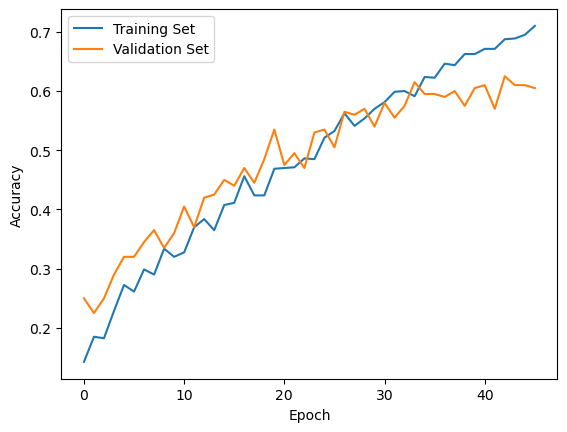

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Set", "Validation Set"]);

In [20]:
from sklearn.metrics import classification_report
y_pred1=np.argmax(model.predict(X_test),axis=1)
y_test1=np.argmax(y_test,axis=1)
print(classification_report(y_test1,y_pred1))

7/7 [==============================] - 0s 696us/step
              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.90      0.90      0.90        20
           2       0.42      0.40      0.41        20
           3       0.62      0.50      0.56        20
           4       0.42      0.40      0.41        20
           5       0.70      0.70      0.70        20
           6       0.79      0.75      0.77        20
           7       0.67      0.80      0.73        20
           8       0.48      0.60      0.53        20
           9       0.35      0.35      0.35        20

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200



In [21]:
model.evaluate(X_test,y_test)[1]

7/7 [==============================] - 0s 786us/step - loss: 1.2145 - accuracy: 0.5950


0.5950000286102295

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

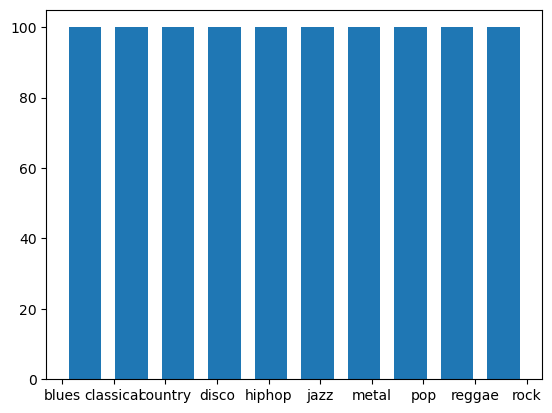

In [22]:
plt.hist(df['label'], rwidth=0.7)

In [27]:
model.save('yoyo.keras')